# Non-random uniform disk sampling

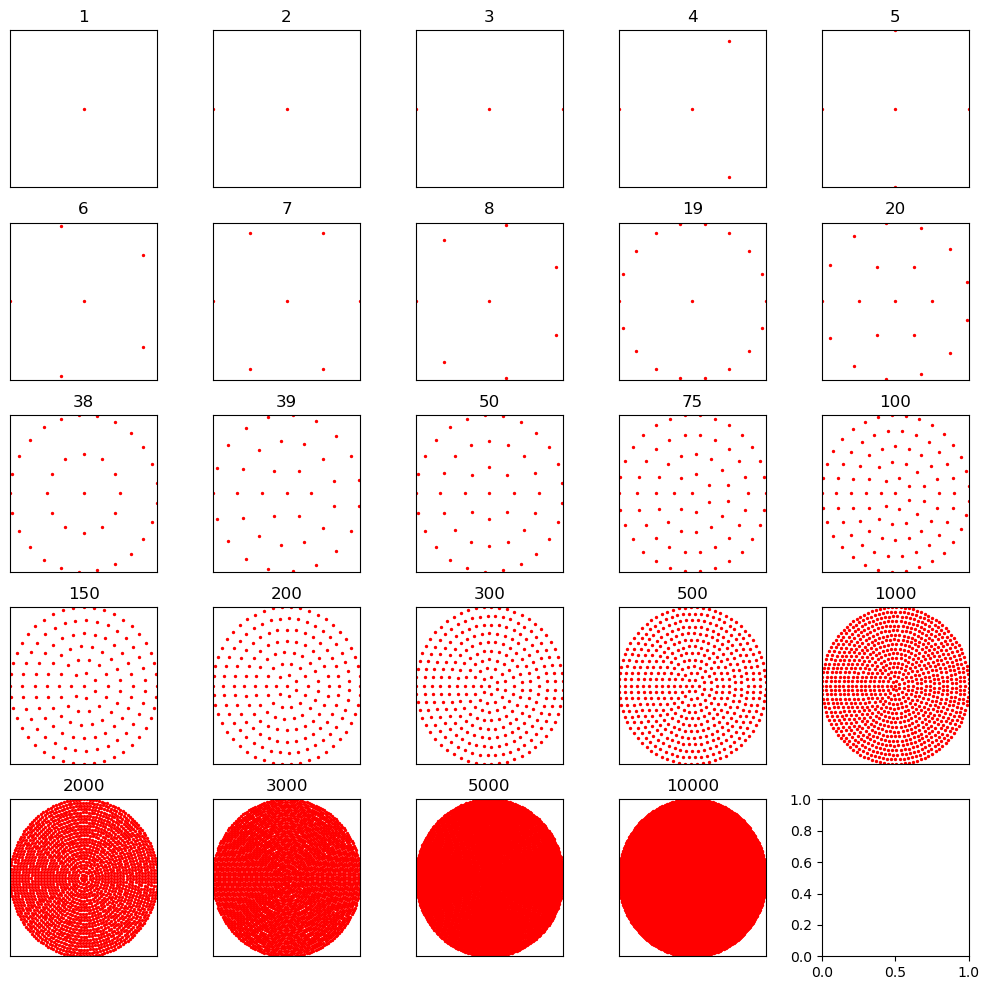

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_disk_sampling(N, diameter=1):
    M = np.floor((-np.pi + np.sqrt(np.pi**2 - 4*np.pi*(1-N))) / (2*np.pi))
    if M == 0:
        M = 1
    alpha = (N-1) / (np.pi * M * (M+1))
    R = np.arange(1, M+1)
    S = 2 * np.pi * alpha * R

    # Ensure the sum of points matches N
    S = np.round(S)
    S[-1] -= (S.sum() - (N - 1))
    S = S.astype(int)

    points = [np.zeros((1, 2))]  # Origin point

    for s, r in zip(S, R):
        theta = np.linspace(-np.pi, np.pi, s+1)[:-1]
        radius = r / M * diameter / 2
        points.append(np.column_stack((radius * np.cos(theta), radius * np.sin(theta))))

    return np.vstack(points)

# Values of N to plot
N_values = [1, 2, 3, 4, 5, 6, 7, 8, 19, 20, 38, 39, 50, 75, 100, 150, 200, 300, 500, 
            1000, 2000, 3000, 5000, 10000]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for i, N in enumerate(N_values):
    if i >= len(axes):  # In case there are more N_values than subplots
        break
    
    points = uniform_disk_sampling(N)
    ax = axes[i]
    ax.scatter(points[:, 0], points[:, 1], s=2, color='red')
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{N}")

plt.tight_layout()
plt.show()
